In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'BankNote_Authentication.csv')
df=pd.DataFrame(data)
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Text(0.5, 1.0, 'Missing Value Visualization Using HeatMap')

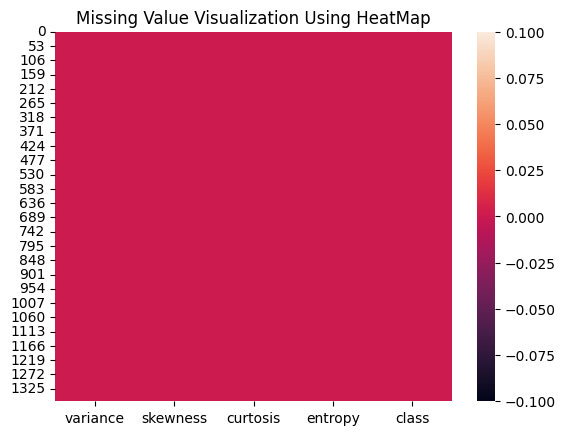

In [12]:
sns.heatmap(df.isnull())
plt.title("Missing Value Visualization Using HeatMap")


<Axes: title={'center': 'Correlation Visualization using HeatMap'}>

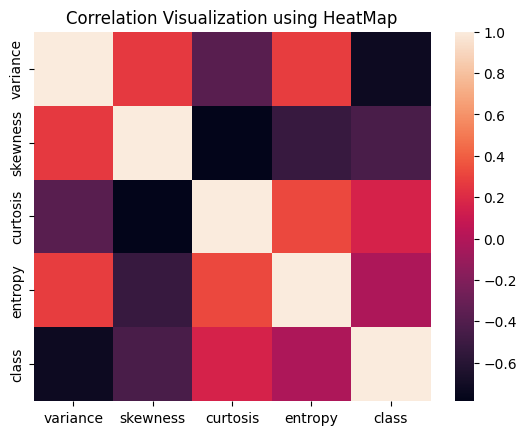

In [13]:
corr=df.corr()
plt.title("Correlation Visualization using HeatMap")
sns.heatmap(corr)


Text(0.5, 1.0, 'Pair Plot Visualization')

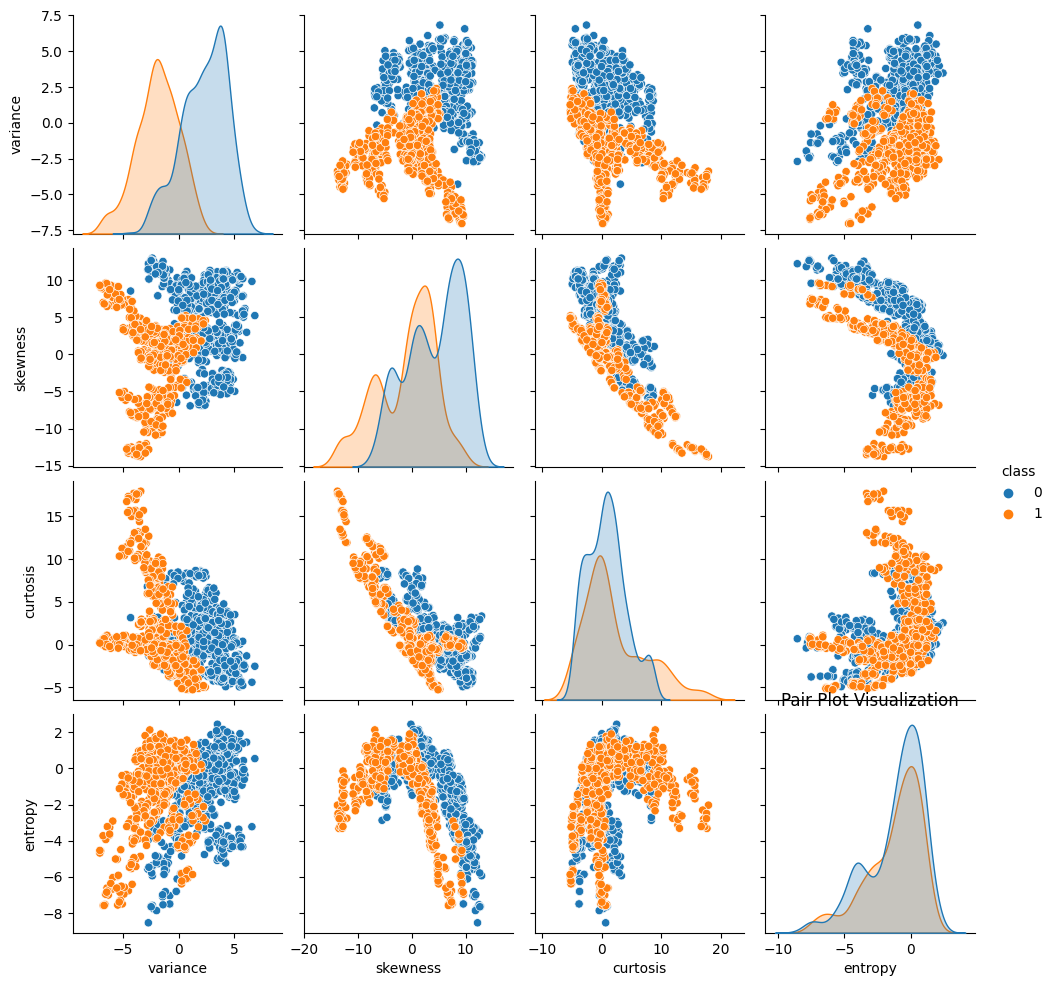

In [6]:
sns.pairplot(data=df,hue='class')
plt.title("Pair Plot Visualization")


In [15]:
x=df.drop(columns=['class'])
y=df['class']

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [19]:
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (960, 4)
X Test Shape (412, 4)
Y Train Shape (960,)
Y Test Shape (412,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
y_predict=tree.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cmatrix=confusion_matrix(y_test,y_predict)
report=classification_report(y_test,y_predict)

In [26]:
print("************************CLASSIFICATION REPORT************************")
print(report)

************************CLASSIFICATION REPORT************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       232
           1       0.97      0.98      0.97       180

    accuracy                           0.98       412
   macro avg       0.97      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



************************CONFUSTION MATRIX WITH VISUALIZATION************************
[[226   6]
 [  4 176]]


<Axes: >

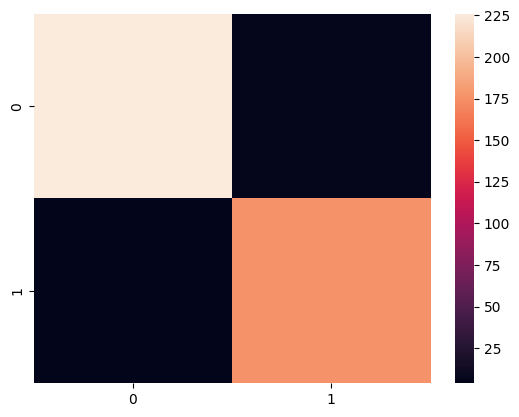

In [27]:
print("************************CONFUSTION MATRIX WITH VISUALIZATION************************")
print(cmatrix)
sns.heatmap(cmatrix)

In [29]:
from sklearn.metrics import accuracy_score
print("The Accuracy Score of the Model is ",accuracy_score(y_test,y_predict)*100)


The Accuracy Score of the Model is  97.57281553398059
